In [52]:
import pandas as pd 
data = pd.read_csv(r"C:\Users\hp\Downloads\Heart Disease.csv")

In [53]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

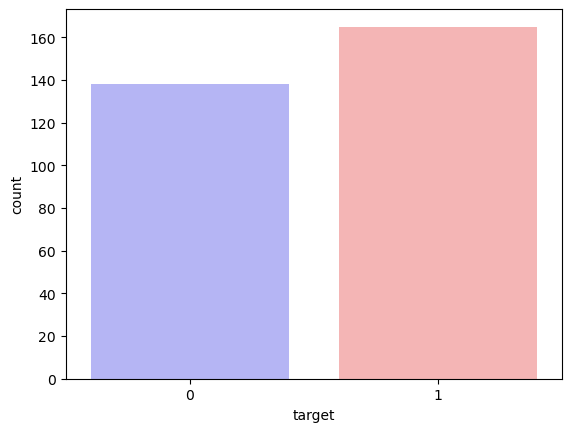

In [56]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

In [57]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])

In [58]:
countNoDisease

138

In [59]:
countHaveDisease

165

In [60]:
print("no Heart Disease %: {:.2f}%".format((countNoDisease / (len(data.target))*100)))

no Heart Disease %: 45.54%


In [61]:
print("Heart Disease %: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Heart Disease %: 54.46%


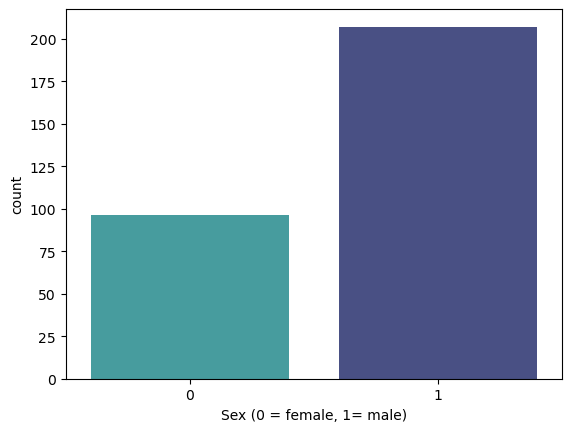

In [62]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [63]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])

In [64]:
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.sex))*100)))

Percentage of Female Patients: 31.68%


In [65]:
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.sex))*100)))
data.groupby('target').mean()

Percentage of Male Patients: 68.32%


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


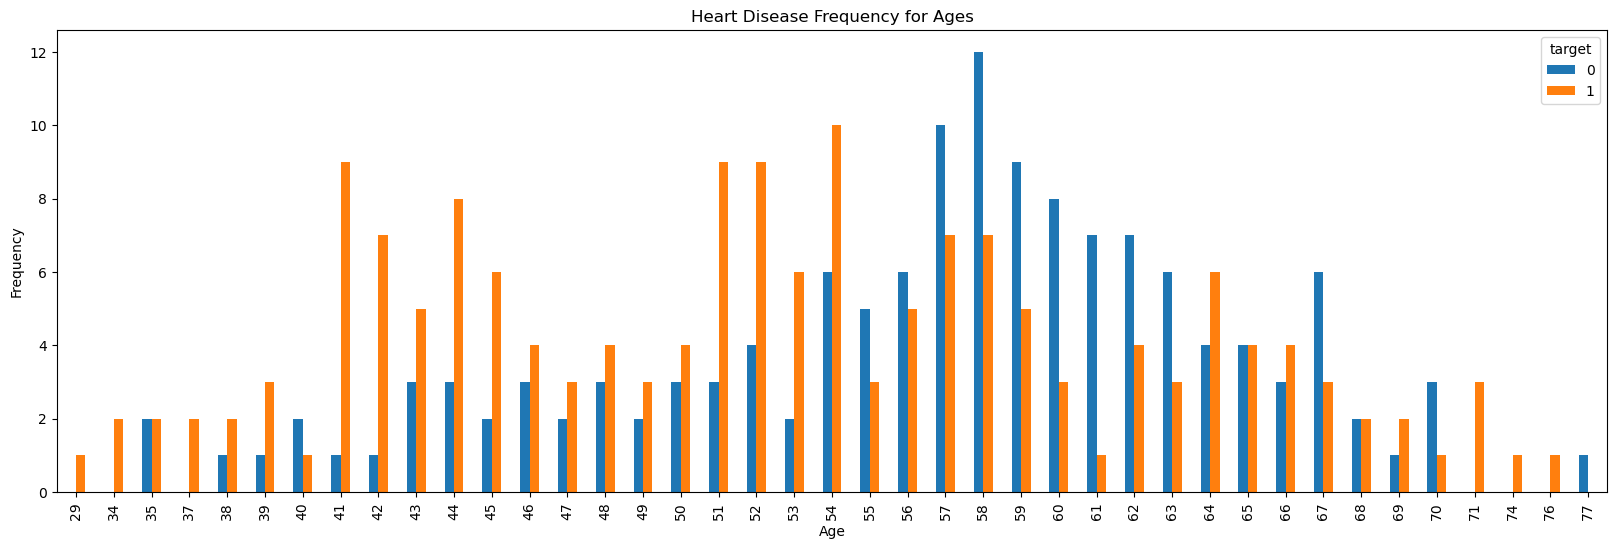

In [66]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

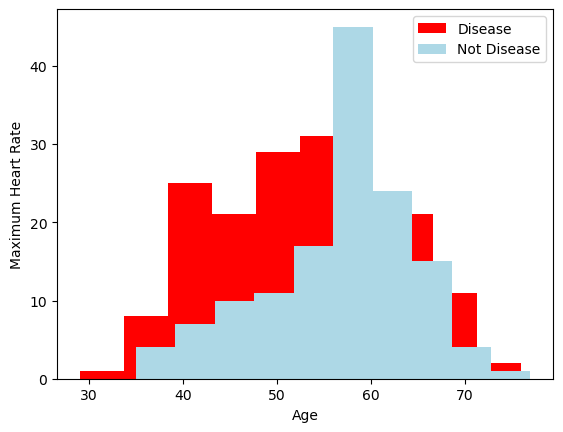

In [67]:
plt.hist(x=data.age[data.target==1],  color ="red")
plt.hist(x=data.age[data.target==0],  color ="lightblue")
#plt.scatter(x=data.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [68]:
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Axes: xlabel='cp', ylabel='target'>

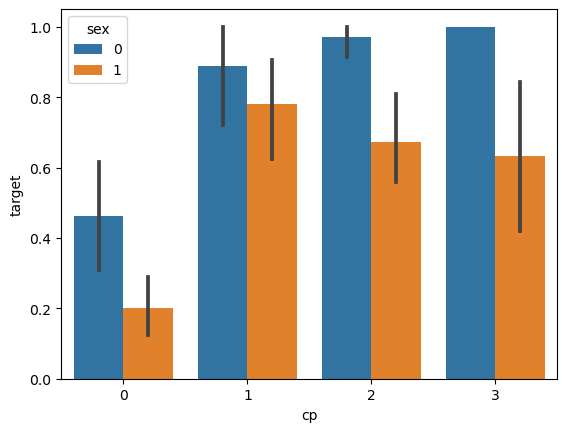

In [69]:
sns.barplot(x = data.cp, y = data.target, hue = data.sex)

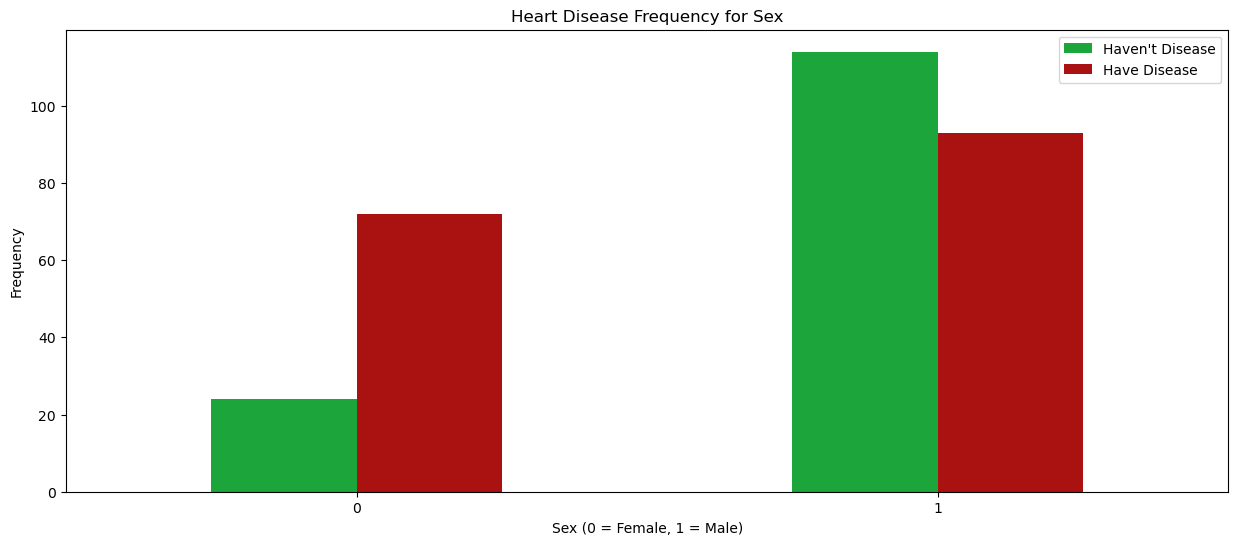

In [70]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

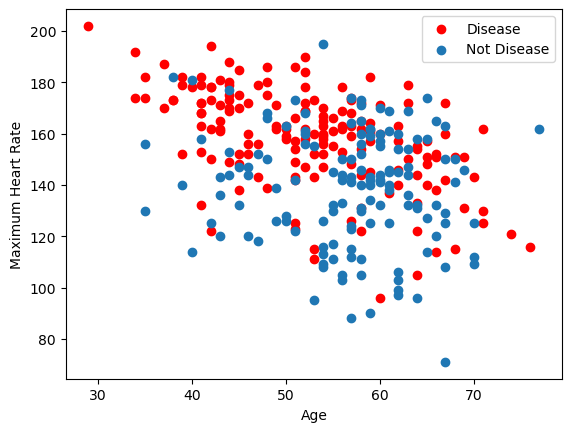

In [71]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

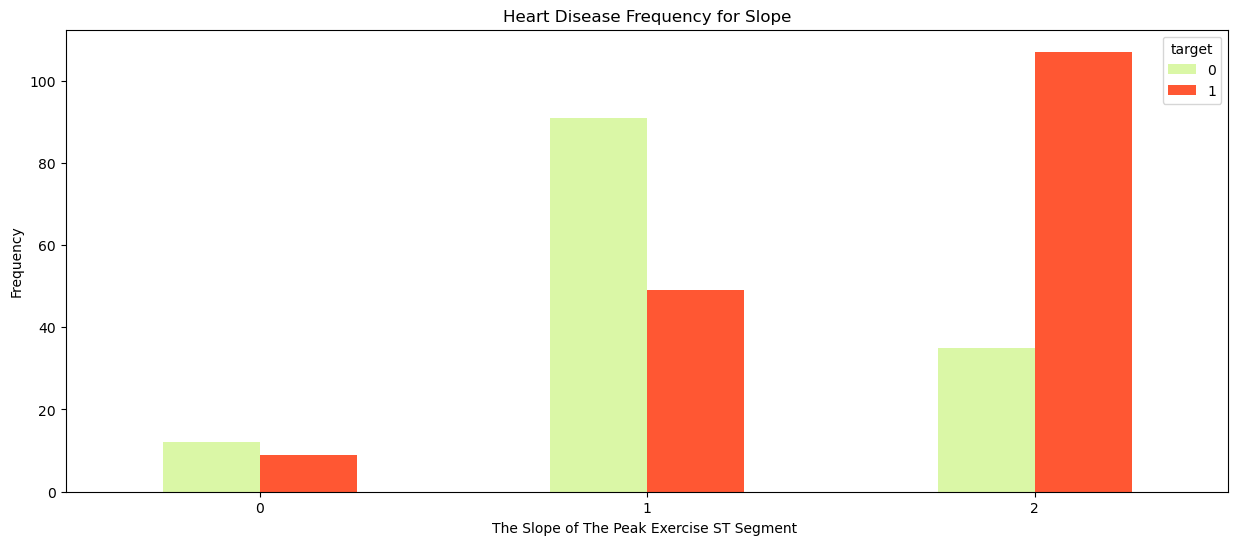

In [72]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

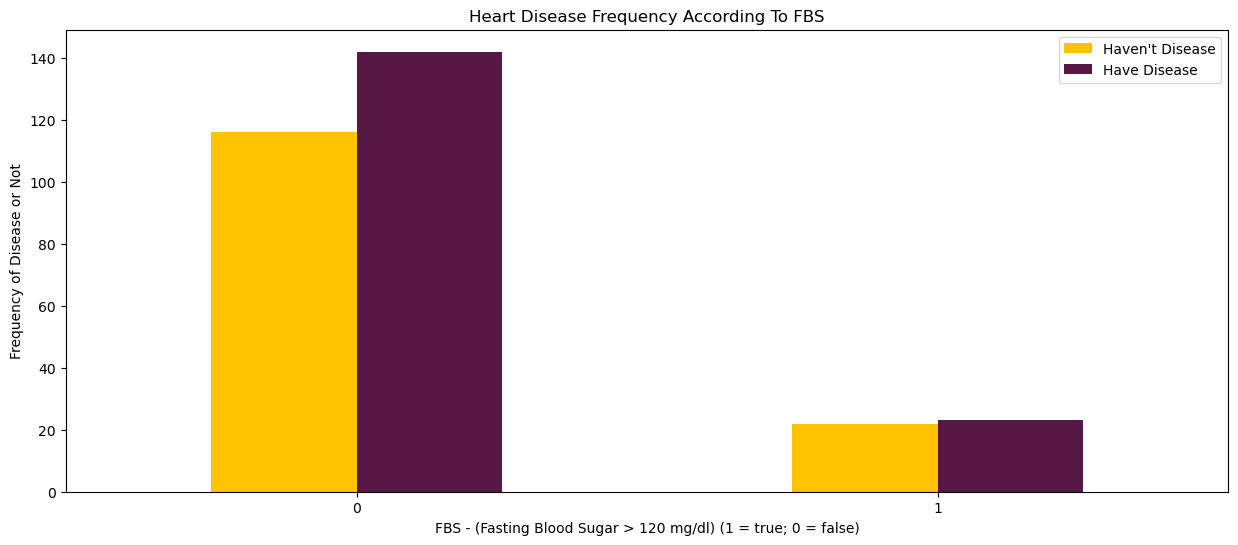

In [73]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

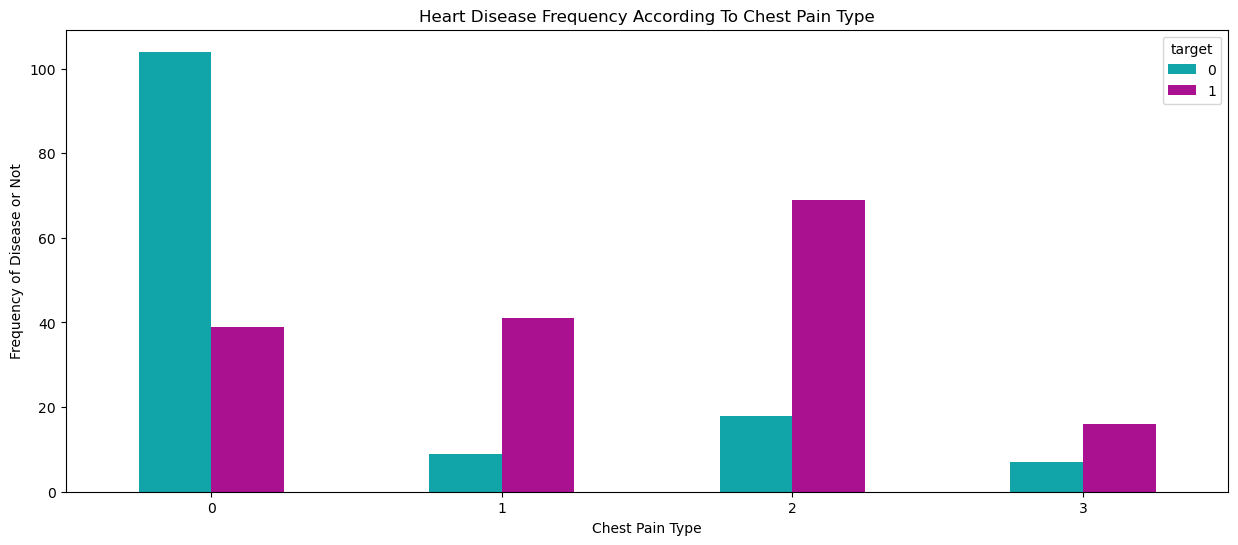

In [74]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [75]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [76]:
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")

In [77]:
a

,cp_0,cp_1,cp_2,cp_3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
298,1,0,0,0
299,0,0,0,1
300,1,0,0,0
301,1,0,0,0


In [78]:
b

,thal_0,thal_1,thal_2,thal_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
298,0,0,0,1
299,0,0,0,1
300,0,0,0,1
301,0,0,0,1


In [79]:
c

,slope_0,slope_1,slope_2
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
298,0,1,0
299,0,1,0
300,0,1,0
301,0,1,0


this line of codes creates dummy variable for the column cp,thal,slope,in the data frame (data)

the prefix = cp argument ads the prefix cp to the column names of the dummy variables to make them easily identifyiable.the resulting data frame will countinue columns each presenting the uniqiue category in the cp column.with binary values 0 or 1 , indicating the presence or abcsence of each category.

In [80]:
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [81]:
data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [82]:
y = data.target.values # dependent or target variable
x_data = data.drop(['target'], axis = 1)# independent variable

In [83]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [84]:
x_data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,...,0,0,0,0,0,0,1,0,1,0
299,45,1,110,264,0,1,132,0,1.2,0,...,0,0,1,0,0,0,1,0,1,0
300,68,1,144,193,1,1,141,0,3.4,2,...,0,0,0,0,0,0,1,0,1,0
301,57,1,130,131,0,1,115,1,1.2,1,...,0,0,0,0,0,0,1,0,1,0


In [85]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


x - x(min) / x(max)-x(min)
attempt to convert your data to normal dist

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [87]:
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

In [88]:
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 82.89%


Decision tree model


the decison tree is a widely used machine learing algorithams for both classification and regression tasks .it is a non linear model that recursively partitioned the input data into subsets based on the diffrent features,creating a tree like structure the basic idea behind the deciosn tree is to split the data at each note based on a certain feature and it threshold ,in a way that the subsets produced become increasingly homogeneious in terms of the target variable.(for classoification )or reduced the variance ( for regression).

thi process is repeated untill a stoping crieteria reached such as reaching a maximum depth,minimum number of samples in a leaf , all impurity threshold (classification)



Suppose good or bad performance of Sunitha in viva - then pre defined options - which means categorical data (can be divided in definite categories)
 For categorical data, we use models which are known as classification models
Now suppose - Sunitha's marks in Viva , which can be anything, so its a continuous variable (eg - height, weight, salary)
For continuous variables, we use models which are known as regression models

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dtc = DecisionTreeClassifier()

In [91]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [92]:
acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 77.63%


this line acc = dtc.score(x_test, y_test)*100 calculates the accuracy of the decison tree classifier (dtc)model on the test  dataset .then this .score methods of the dtc model compute the mean accuracy for the given data and labels.the x test represents the features the y label represents the true labels.the result is multiplied by 100 to convert te accuracy into percentage.  t
accuracies['Decision Tree'] = acc
this line stores the accuracy value acc in the accuracy dictionary it associates the accuracy value with the key decison tree allowing us to keep track of accuracy values for a diffrent models
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

this line print the test accuracy of the decison tree model which two decimsl plsces.the :2f in the string format specifies that 2 decimal places should we show the .format (acc ) inserts the calculated the accuracy value in the string value.

random forest is applied as an ensemble method in ML approch it is an enselmble ML method that is used for both claasification and regerssion tasks.it combines the prediction of multiple decion trees to makes a final prediction.each decision tree is train on subsets of the data and makes its own prediction .the final predictionis then determined by aggragating the prediction of all decison trees.

benefits of random forest 
1.handles nonlinear values relationship well
2.robust to outliers and noise (means fluctuation of the data 
3.reduces the overfitting reduces due to ensamble averages

in case of classification the final prediction of the random forest is determind by the majority outcome of the prediction.
for regression task the final predictionis te averages of the prdcition from the all the decsion trees.


In [93]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1)

In [95]:
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 86.84%


In [96]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [97]:
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 86.84%


In [98]:
rf = RandomForestClassifier(n_estimators = 50, random_state = 1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [99]:
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 84.21%


In [100]:
rf = RandomForestClassifier(n_estimators = 2, random_state = 1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=2, random_state=1)

In [101]:
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 78.95%


overfitting is when model copies past patterns
when training score is high and testing score is low
underfitting is when both training score and testing score is low

A Decision Tree is a popular machine learning algorithm used for both classification and regression tasks. It is a tree-like model that recursively splits the data based on the most significant features, aiming to create subsets with high homogeneity in the target variable.

The algorithm works as follows:

Data Splitting: Starting from the root node, the algorithm selects the feature and threshold that best separates the data into different subsets based on some criterion (e.g., Gini impurity or entropy for classification, mean squared error for regression).
Gini impurity is a criterion used to measure the level of impurity or disorder in a set of class labels in the context of decision trees and other classification algorithms. It is commonly used as a metric for evaluating how well a split separates classes in the dataset.
Recursive Process: The data is then split into two or more branches, and the process is repeated for each subset (child nodes) until a stopping criterion is met. This criterion can be the maximum depth of the tree, a minimum number of samples in a node, or when further splitting does not improve the model's performance significantly.

Leaf Nodes: Once the recursive process stops, the terminal nodes of the tree are called leaf nodes. Each leaf node represents a predicted value (in regression) or a class label (in classification) for the input data.

Decision Trees have several advantages, including ease of interpretability, ability to handle both numerical and categorical data, and robustness to outliers. However, they can be prone to overfitting, especially when the tree is deep and complex.
Decision Trees have hyperparameters that can be tuned to optimize the model's performance, such as max_depth, min_samples_split, and others. Tuning these hyperparameters can help prevent overfitting and improve the model's generalization capabilities.
Decision Trees offer several advantages as a machine learning algorithm, making them a popular choice for various tasks. Here are some of the key advantages of Decision Trees:

Interpretability: Decision Trees are highly interpretable. The model's structure resembles a flowchart, making it easy to understand and visualize how the decisions are made. This interpretability is especially valuable in applications where the model's decisions need to be explained to non-technical stakeholders.

ndling Non-Linearity:Handling Non-Linearity…Ha Decision Trees can naturally handle non-linear relationships between features and the target variable. Unlike linear models, which require transforming features to capture non-linear patterns, Decision Trees can learn complex decision boundaries without additional transformations.

Mixed Data Types: Decision Trees can handle both numerical and categorical features. They do not require feature scaling or one-hot encoding for categorical variables, making data preparation less complex.

Feature Importance: Decision Trees provide a measure of feature importance. By evaluating how much each feature contributes to the model's decision-making process, we can gain insights into the most influential features for prediction.

Robust to Outliers: Decision Trees are relatively robust to outliers in the data. They partition the data based on ranks, not absolute distances, reducing the impact of outliers compared to other algorithms like k-means clustering.

Handling Missing Values: Decision Trees can handle missing values in the dataset. They can work with the available data by selecting the most informative feature to split on, even if some values are missing for that feature.

No Assumptions: Decision Trees make no assumptions about the data distribution or relationships between features. This flexibility allows them to perform well on diverse datasets without the need for strong prior assumptions.

Ensemble Methods: Decision Trees can be used as the base learner for powerful ensemble methods like Random Forests and Gradient Boosting. These ensemble techniques combine multiple Decision Trees to improve performance, often resulting in highly accurate models.

Efficiency: Decision Trees have efficient training and prediction times, especially for small to medium-sized datasets. The tree structure allows for fast lookup times, making predictions in logarithmic time complexity.

Multi-Class Classification: Decision Trees naturally extend to handle multi-class classification tasks without the need for one-vs-rest or one-vs-one strategies.

Despite these advantages, Decision Trees also have some limitations, such as potential overfitting on complex datasets, instability in the presence of small perturbations, and difficulty in modeling certain types of problems. However, their strengths make them a valuable tool in the machine learning toolbox, especially when used in conjunction with other techniques like pruning, ensemble methods, or regularization to address their limitations.

Decision Tree Classification and Decision Tree Regression are two variants of the Decision Tree algorithm used for different types of machine learning tasks: classification and regression, respectively. Both variants share the same fundamental structure of recursively splitting the data based on feature values, but they differ in their output and the metrics used for evaluating splits.
Decision Tree Classification:

Task: Decision Tree Classification is used for tasks where the target variable is categorical or belongs to a discrete set of classes. The algorithm assigns the input data points to specific classes based on the majority class in each leaf node of the tree.

Output: The output of a Decision Tree Classification is the class label of the leaf node to which a data point belongs.

Splitting Criterion: Commonly used metrics for evaluating splits in classification tasks include Gini impurity and information gain (entropy). These metrics assess the purity of the classes within each child node resulting from a split.

Example: Classifying emails as "spam" or "not spam," predicting the species of a flower, or identifying whether a customer will churn or not.

Decision Tree Regression:

Task: Decision Tree Regression is used for tasks where the target variable is continuous or numeric. The algorithm predicts the output value by taking the average (or weighted average) of the target variable within each leaf node.

Output: The output of a Decision Tree Regression is a continuous numeric value representing the predicted output for the input data point.

Splitting Criterion: For regression tasks, the commonly used metric for evaluating splits is Mean Squared Error (MSE). It calculates the variance of the target variable within each child node.

Example: Predicting house prices, estimating the demand for a product based on various factors, or forecasting future sales.

In both cases, Decision Trees work by recursively partitioning the data into subsets at each node, attempting to minimize impurity (for classification) or variance (for regression) in the child nodes. Decision Trees have a hierarchical structure where the internal nodes represent the splitting conditions, and the leaf nodes represent the predictions.



some of the classification algorithms


logistic regression

a simple linear classifier that models the probability of binary outcomes 

Decesion tree

hierachical structure to split the data based on features to make decisions 

Random forest

An ensamble of decsion tree improve the accuracy reduce the overfitting

cross validation 


support vector machine (SVM)

efefctive for binary and multiclass clasification task,

KNN 

K nearest neighbours (KNN) classifiers data based on  majority class of it K nearest neighboures 

regression algorthms

linear regression models a linear relationship between features and target variable 

decsion tree(regression)

hierachical structures for regression task

1. random forest regressor

.ensemble regeression tree to improve accuracy and reduce overfitting.

support vector machine (regressor)

a extension of svm for regression task 

gradient boosting 

boosting ensemble method for regrssion task

which are the algorithms who are 

Less Susceptible to Outliers/Overfitting:1. How to apply decision tree and random forest in heart disease dataset


1 logistic regression - generaly less sensitive to outliers 
2 Random forest
less prone to overfitting due to the  ensemble approach 

gradient boosting

prone to overfitting if not control but less sensetaive to outlier 

support vector regression less sensetive to  outliers coapere to SVR for clasification

impact of outliers and overfitting depends on the specific data set and hyper arameters  chosen fir each algorithms.

preprocessing and hyper parameter tuning ar e critical steps to improve the performance and robustness ofmachine learning models


1. How to apply decision tree and random forest in heart disease dataset
[ Class:  What is decision tree algorithm, random forest algorithm
] Class: benefits, also disadvantages

3. Which are the classifier models
4. Which are the regression model Class: 5. Which models are more impacted by outliers 6. which are more impacted by overfitt  ing

  




In [102]:
from sklearn.svm import SVC

In [103]:
svm = SVC(random_state = 1)

In [104]:
svm.fit(x_train, y_train)

SVC(random_state=1)

In [105]:
acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc

In [106]:
acc

82.89473684210526

In [107]:
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 82.89%


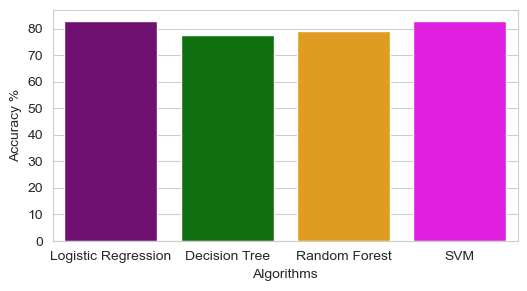

In [108]:
colors = ["purple", "green", "orange","magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(6,3))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [109]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_head_rf = rf.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy (Random Forest):", accuracy_score(y_test, y_head_rf))
print("Precision (Random Forest):", precision_score(y_test, y_head_rf))
print("Recall (Random Forest):", recall_score(y_test, y_head_rf))

Accuracy (Random Forest): 0.8421052631578947
Precision (Random Forest): 0.8604651162790697
Recall (Random Forest): 0.8604651162790697


Accuracy--the accuracy scores calculate the ratio of corect prediction to totalnumber of prediction
precision--it is a ratio of tru positive prediction to the total numer of positive prediction
recall ---true postive prdiction out of total number of actual positives

Recall = True Positives / (True Positives + False Negatives)
Precision = True Positives / (True Positives + False Positives)
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

an example--hypothetical example to see how wthis metrix works.what is true positive

suppose we have tested 100 indivduals for a particular desease 

True positve means (corectly detected cases of the deseas) 80 

False postive --incorectly detected cases of deseas. 10

True negative (corectly identify the non cases) 5 

false negaitive miss case of the deseas 5


Reacall =80/(80+5)  precison=80/(80+10)F1 score = 2 ((Precision * Recall)/(Precision * Recall)

recall indicates the test can corectly identify -- % of the acutual cases of the deseas

precsion indicates --among the cases detected by the test --percent is true positve cases 

F1 score combines both metrix to provide an overall asessment of the test performance .





In [110]:
# Predicted values
y_head_lr = lr.predict(x_test)

In [112]:
y_head_lr

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [113]:
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)
y_head_svm = svm.predict(x_test)

In [114]:
y_head_dtc

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [115]:
y_head_rf 

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [116]:
y_head_svm 

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [117]:
from sklearn.metrics import confusion_matrix

confusion matrix is a table used to describe the peformance of a classification model on aset of data for which the true values are known.

it allowes us to visualise the performance of a model in terms of true positive true negative false positive and false naegative predictions.these metrics are especially useful for evalauting the performance of binary classification model.




In [119]:
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_svm = confusion_matrix(y_test,y_head_svm)

In [120]:
cm_lr

array([[25,  8],
       [ 5, 38]], dtype=int64)

In [121]:
cm_dtc 

array([[27,  6],
       [11, 32]], dtype=int64)

In [122]:
cm_rf

array([[27,  6],
       [ 6, 37]], dtype=int64)

In [123]:
cm_svm 

array([[25,  8],
       [ 5, 38]], dtype=int64)

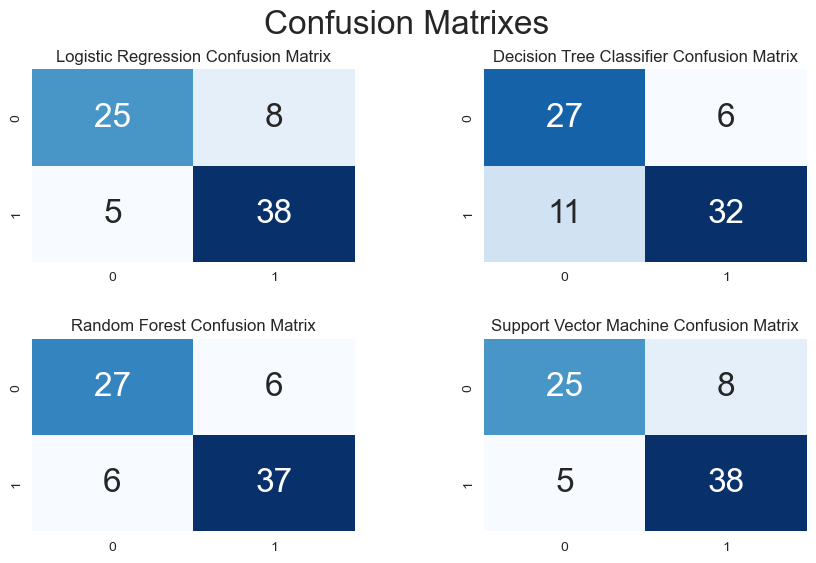

In [124]:
plt.figure(figsize=(10,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,4)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

plt.subplot(2,2,1), plt.subplot(2,2,2), plt.subplot(2,2,3), plt.subplot(2,2,4)  these sets up 2x2 grid of subplots and specify the position of each subplots.each of these subplots is displaying the confusion matrix for a diffrent classification models.

the confusion matrix are visualise using the heatmaps where the colour intensity   the number of instances in each category .

the sns .heatmaps() funtion is used to create the heatmap.

